In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score


Xtest=pd.read_csv(r'X_test.csv')
Xtrain=pd.read_csv(r'X_train.csv')
Y=pd.read_csv(r'Y_train.csv')



In [17]:
Xtrain.head()

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [18]:
Y.head()

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


C:\Users\adamh\AppData\Local\Temp\ipykernel_14004\1433562532.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'upward' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y.loc[Y[col[1]]>e,col[1]]='upward'
C:\Users\adamh\AppData\Local\Temp\ipykernel_14004\1433562532.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(limit_direction='both',inplace=True)


model accuracy 0.63 f1 score:0.63


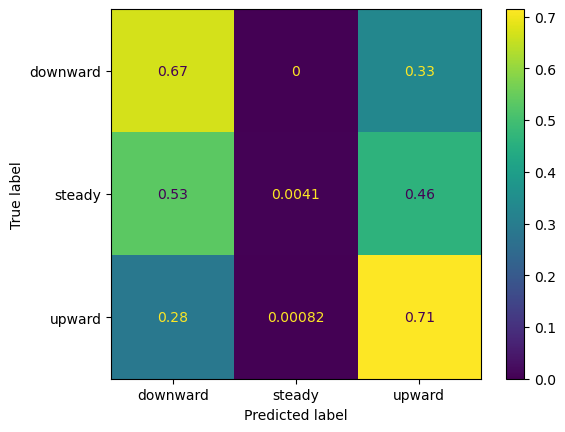

In [19]:
e=2
col=Y.columns
y=Y.copy()
y.loc[Y[col[1]]>e,col[1]]='upward'
y.loc[Y[col[1]]<-e,col[1]]='downward'
y.loc[(Y[col[1]] <= e) & (Y[col[1]] >= -e), col[1]] = "steady"
# y.loc[Y[col[1]]>=-e,col[1]]="steady"
df=pd.merge(y,Xtrain,on='DELIVERY_START')
df=pd.merge(Y,df,on='DELIVERY_START')
df.head()

df.interpolate(limit_direction='both',inplace=True)

test_size=0.25
train_df,validation_df= train_test_split(df,test_size=test_size)
# Train random forest
x_train = train_df.iloc[:, 4:11].to_numpy(dtype=float)
y_train=train_df['spot_id_delta_y'].tolist()

rf = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=0)# fill missing command
rf.fit(x_train,y_train) # complete  command  
# refer to previous lab about logistic regression classification evaluation
x_val=np.array(validation_df.iloc[:, 4:11].to_numpy(dtype=float))
y_val=validation_df['spot_id_delta_y'].tolist()
y_pred=rf.predict(x_val)

acc=accuracy_score(y_val,y_pred, normalize=True)
f1=f1_score(y_val,y_pred,labels=['downward', 'steady', 'upward'],average='micro')
print(f'model accuracy {acc:0.2f} f1 score:{f1:0.2f}')
cm=confusion_matrix(y_val,y_pred,labels=['downward', 'steady', 'upward'], normalize='true')
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['downward', 'steady', 'upward'])
cm_disp.plot()
plt.show()



In [20]:
print(len(y_val))
print(len(y_pred))
print(type(y_val))
print(type(y_pred))
y_val
yvalFloat=validation_df['spot_id_delta_x'].tolist()
print(yvalFloat)
print(y_val)
print(len(yvalFloat))
print(len(y_val))
list(y_pred)



2652
2652
<class 'list'>
<class 'numpy.ndarray'>
[-15.96502144190498, -34.76800007507222, 25.526424349005254, 8.518994234084289, 33.69102437862304, 15.178520967926914, -12.924490522625206, 29.43621761226359, -3.4808733875605924, 13.741402905198782, -30.66003971680192, 0.0570677344010732, -14.813157166411427, -1.7839214039802016, -24.77300040724901, -6.563580834593836, -5.135158254129379, -2.894718890012996, -29.19597412025962, 37.820403334229695, -12.320715912496269, -7.0751621462264325, -10.849415400802258, -7.721748651740455, 18.73735845006175, 10.68796732478927, 11.431780135004814, -28.590964685314702, -94.15579087220368, -21.672099544853893, -5.057343309724956, -133.28472009959637, -5.9002667806755085, -6.66496215928575, -31.282560900442206, -6.595685937025394, -22.83715857215316, -30.929058626465636, -46.4390164110842, 4.300690363673709, -1.4321562422744023, -10.177352398523963, 6.3708048373644885, -5.7346807795699135, 6.280790002151619, -0.9763271989299368, -33.808937815399645, -

['downward',
 'upward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'upward',
 'upward',
 'downward',
 'downward',
 'upward',
 'upward',
 'downward',
 'downward',
 'downward',
 'upward',
 'upward',
 'upward',
 'upward',
 'downward',
 'downward',
 'upward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'downward',
 'upward',
 'downward',
 'downward',
 'downward',
 'downward',
 'downward',
 'upward',
 'downward',
 'downward',
 'downward',
 'upward',
 'downward',
 'downward',
 'upward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'upward',
 'downward',
 'downward',
 'upward',
 'downward',
 'upward',
 'downward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'downward',
 'upward',
 'downward',
 'downward',
 'upward',
 'upward',
 'upward',
 'upward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downward',
 'downward',
 'downward',
 'downward',
 'upward',
 'upward',
 'upward',
 'downw

In [21]:
def WA(y_val,y_pred,yvalFloat):
    dfW=pd.DataFrame({
        'yval':y_val,
        'y_pred':list(y_pred),
        'y_valFloat':yvalFloat
    })
    dfW['ecart']=dfW.apply(lambda row: 1 if row['yval'] == row['y_pred'] else -1, axis=1)
    dfW['ecart weighted']=dfW['ecart']*dfW['y_valFloat'].abs()
    d=dfW['ecart weighted'].abs().sum()
    dfW['ecart weighted accuracy']=dfW['ecart weighted']/d
    r=dfW['ecart weighted accuracy'].sum()
    r=1
    dfW['ecart weighted accuracy percentage']=dfW['ecart weighted accuracy']/r
    rr=dfW['ecart weighted accuracy percentage'].sum()
    scoreP=dfW[dfW['ecart weighted accuracy percentage']>0]['ecart weighted accuracy percentage'].sum()
    scoreN=dfW[dfW['ecart weighted accuracy percentage']<0]['ecart weighted accuracy percentage'].sum()
    return scoreP,scoreN,dfW.head(10)



In [22]:
x_test = Xtest.iloc[:, 3:11].to_numpy(dtype=float)
y_pred_test = rf.predict(x_test)
y_pred_test

array(['downward', 'downward', 'downward', ..., 'downward', 'downward',
       'downward'], dtype='<U8')

In [23]:


df_pred = pd.DataFrame({
    "DELIVERY_START": Xtest['DELIVERY_START'],
    "spot_id_delta": y_pred_test
})
def assign_value(x):
    if x == 'upward':
        return 1
    elif x == 'downward':
        return -1
    else:
        return 0

# Apply the function to the column
df_pred['spot_id_delta'] = df_pred['spot_id_delta'].apply(assign_value)
df_pred['spot_id_delta'] = df_pred['spot_id_delta'].astype(float)*validation_df['spot_id_delta_x'].mean()

# Export CSV
df_pred.to_csv("predictions_rf.csv", index=False)

In [24]:
print(WA(y_val,y_pred,yvalFloat))

(0.7472080507739501, -0.25279194922604986,        yval    y_pred  y_valFloat  ecart  ecart weighted  \
0  downward  downward  -15.965021      1       15.965021   
1  downward    upward  -34.768000     -1      -34.768000   
2    upward  downward   25.526424     -1      -25.526424   
3    upward    upward    8.518994      1        8.518994   
4    upward    upward   33.691024      1       33.691024   
5    upward    upward   15.178521      1       15.178521   
6  downward  downward  -12.924491      1       12.924491   
7    upward    upward   29.436218      1       29.436218   
8  downward    upward   -3.480873     -1       -3.480873   
9    upward  downward   13.741403     -1      -13.741403   

   ecart weighted accuracy  ecart weighted accuracy percentage  
0                 0.000297                            0.000297  
1                -0.000647                           -0.000647  
2                -0.000475                           -0.000475  
3                 0.000158          

### On a vu que le random forest donne une weighted precision de 70%. Quelle est la précision de la méthode 'intraday supérieur à spot'

In [25]:
y_pred_u=y_pred.copy()
y_pred_u[:]='upward'
print(WA(y_val,y_pred_u,yvalFloat))


(0.5121554280584739, -0.48784457194152603,        yval  y_pred  y_valFloat  ecart  ecart weighted  \
0  downward  upward  -15.965021     -1      -15.965021   
1  downward  upward  -34.768000     -1      -34.768000   
2    upward  upward   25.526424      1       25.526424   
3    upward  upward    8.518994      1        8.518994   
4    upward  upward   33.691024      1       33.691024   
5    upward  upward   15.178521      1       15.178521   
6  downward  upward  -12.924491     -1      -12.924491   
7    upward  upward   29.436218      1       29.436218   
8  downward  upward   -3.480873     -1       -3.480873   
9    upward  upward   13.741403      1       13.741403   

   ecart weighted accuracy  ecart weighted accuracy percentage  
0                -0.000297                           -0.000297  
1                -0.000647                           -0.000647  
2                 0.000475                            0.000475  
3                 0.000158                            0.00

In [26]:
e=0.1
col=Y.columns
y=Y.copy()
y.loc[Y[col[1]]>e,col[1]]='upward'
y.loc[Y[col[1]]<-e,col[1]]='downward'
y.loc[(Y[col[1]] <= e) & (Y[col[1]] >= -e), col[1]] = "steady"
# y.loc[Y[col[1]]>=-e,col[1]]="steady"
df=pd.merge(y,Xtrain,on='DELIVERY_START')
df=pd.merge(Y,df,on='DELIVERY_START')

df.head(100)

C:\Users\adamh\AppData\Local\Temp\ipykernel_14004\352061457.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'upward' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y.loc[Y[col[1]]>e,col[1]]='upward'


,DELIVERY_START,spot_id_delta_x,spot_id_delta_y,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,-36.874770,downward,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,-12.643588,downward,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,-1.950193,downward,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,1.938272,upward,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,0.199907,upward,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-05 01:00:00+01:00,29.271750,upward,57662.0,2806.0,11487.0,46548.0,8068.0,0.0,328.415503,0.0,NaN
96,2022-01-05 02:00:00+01:00,36.677007,upward,56785.0,2806.0,11487.0,46548.0,7609.0,0.0,266.595488,0.0,NaN
97,2022-01-05 03:00:00+01:00,27.319938,upward,55252.0,2806.0,11487.0,47248.0,7308.0,0.0,173.708618,0.0,NaN
98,2022-01-05 04:00:00+01:00,26.065351,upward,55253.0,2806.0,11487.0,47248.0,7032.0,0.0,108.927020,0.0,NaN
